<a href="https://www.kaggle.com/code/dylphion/cyclistic-bike-share-case-study?scriptVersionId=106273333" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(here) 
    library(skimr)
    library(janitor)
    library(lubridate)
    library(ggrepel)
    library(dplyr)
    library(data.table)
    library(ggplot2)
    library(scales)
})
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

[1] "cyclistic-bike-share-dataset"

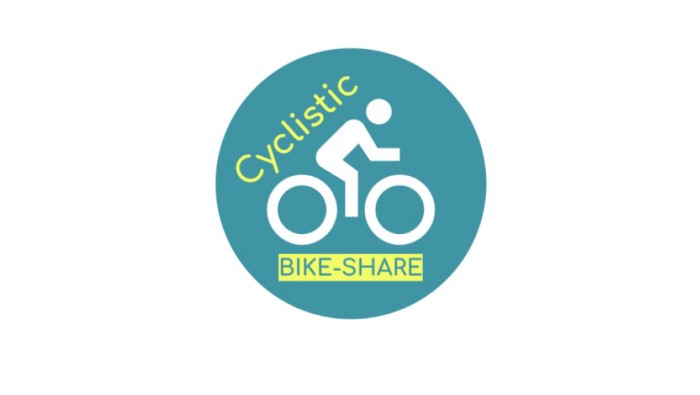

**NOTE** : This case study/publication is part of the capstone project under Google-Coursera’s Data Analytics course.

# 1. Introduction

**Cyclistic** : A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself
apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with
disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about
8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to
commute to work each day.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

# 2. Ask Phase

## 2.1 Business Task
Comparing the usage data of annual members versus casual riders to apply insights into the marketing strategy of converting casual riders into annual members.

## 2.2 Stakeholders
* Lily Moreno - The director of marketing and project manager.
* Cyclistic marketing analytics team
* Cyclistic executive team


# 3. Prepare Phase

## 3.1 Dataset Source and Accessibility
The datasets are provided by Cyclistic and downloaded from this website: https://ride.divvybikes.com/data-license-agreement

(**NOTE** : The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, The data has been made available by Motivate International Inc. under this [licence](https://ride.divvybikes.com/data-license-agreement))

## 3.2 Data Organization
The data that will be used for this analysis are trip data from 12 months prior. Starting month is August 2021 and ends in July 2022. The data records each trip which is anonymized and includes :
* Ride ID
* Ride type
* Trip start and end datetime
* Trip start station (with station IDs and coordinates)
* Trip end station (with station IDs and coordinates)

## 3.3 Data Credibility and Integrity
The data acomes direcly from the company which is reliable and original. While inspecting the data, we found out that there is quite a significant number of missing data regarding station name and ID. However, coordinates for these trips are provided completely which can be then matched to the existing ones to determine the name and ID of the station. Although this fixes the issue, the solution provided is only a temporary fix and should be solved during the data gathering phase to provide unbiased data completely.

# 4. Process
## 4.1 Data importing
Let's start by importing all the data needed for this analysis

In [2]:
trips_08_21 <- read_csv("../input/cyclistic-bike-share-dataset/202108-divvy-tripdata.csv", show_col_types = FALSE)
trips_09_21 <- read_csv("../input/cyclistic-bike-share-dataset/202109-divvy-tripdata.csv", show_col_types = FALSE)
trips_10_21 <- read_csv("../input/cyclistic-bike-share-dataset/202110-divvy-tripdata.csv", show_col_types = FALSE)
trips_11_21 <- read_csv("../input/cyclistic-bike-share-dataset/202111-divvy-tripdata.csv", show_col_types = FALSE)
trips_12_21 <- read_csv("../input/cyclistic-bike-share-dataset/202112-divvy-tripdata.csv", show_col_types = FALSE)
trips_01_22 <- read_csv("../input/cyclistic-bike-share-dataset/202201-divvy-tripdata.csv", show_col_types = FALSE)
trips_02_22 <- read_csv("../input/cyclistic-bike-share-dataset/202202-divvy-tripdata.csv", show_col_types = FALSE)
trips_03_22 <- read_csv("../input/cyclistic-bike-share-dataset/202203-divvy-tripdata.csv", show_col_types = FALSE)
trips_04_22 <- read_csv("../input/cyclistic-bike-share-dataset/202204-divvy-tripdata.csv", show_col_types = FALSE)
trips_05_22 <- read_csv("../input/cyclistic-bike-share-dataset/202205-divvy-tripdata.csv", show_col_types = FALSE)
trips_06_22 <- read_csv("../input/cyclistic-bike-share-dataset/202206-divvy-tripdata.csv", show_col_types = FALSE)
trips_07_22 <- read_csv("../input/cyclistic-bike-share-dataset/202207-divvy-tripdata.csv", show_col_types = FALSE)

###  
As seen from the imports, the dataset seems to share similar features. Let's try to find whether there are features that don't match in these datasets

In [3]:
#Comparing each table to check for any mismatch feature
compare_df_cols(trips_08_21, trips_09_21, trips_10_21, trips_11_21, 
                trips_12_21, trips_01_22, trips_02_22, trips_03_22,
                trips_04_22, trips_05_22, trips_06_22, trips_07_22, 
                return = "mismatch")

column_name,trips_08_21,trips_09_21,trips_10_21,trips_11_21,trips_12_21,trips_01_22,trips_02_22,trips_03_22,trips_04_22,trips_05_22,trips_06_22,trips_07_22
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


From the results shown, all the features are matching. Based on this, we can create a dataset that merges all the data provided for efficiency in data cleaning and analysis.

In [4]:
total_trips <- rbind(trips_08_21, trips_09_21, trips_10_21, trips_11_21, 
                     trips_12_21, trips_01_22, trips_02_22, trips_03_22, 
                     trips_04_22, trips_05_22, trips_06_22, trips_07_22)

## 4.2 Data Cleaning
Before we start, let's preview the data to learn more about the structure of the data itself

In [5]:
#Sampling some rows from the dataset to give an idea on the dataset
sample_n(total_trips,10)
#Description on the structure of the dataset itself
str(total_trips)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CED5809D656703B8,electric_bike,2022-05-05 10:19:09,2022-05-05 10:43:15,Morgan St & 31st St,TA1308000046,Michigan Ave & Lake St,TA1305000011,41.83776,-87.65109,41.88602,-87.62412,casual
113F94E0959F6245,classic_bike,2021-08-02 18:40:52,2021-08-02 18:53:40,Lakefront Trail & Wilson Ave,639,Clarendon Ave & Junior Ter,13389,41.96585,-87.64536,41.96100,-87.64960,member
9981E61C1968BE5A,classic_bike,2021-08-19 18:15:15,2021-08-19 18:23:46,Clark St & Bryn Mawr Ave,KA1504000151,Clark St & Leland Ave,TA1309000014,41.98359,-87.66915,41.96710,-87.66743,member
C44C3A96670D76AB,electric_bike,2021-10-10 07:34:17,2021-10-10 07:46:42,Fairbanks St & Superior St,18003,Wood St & Augusta Blvd,657,41.89572,-87.62016,41.89911,-87.67222,casual
D33AF795CA1BEE4A,electric_bike,2022-07-07 09:31:35,2022-07-07 09:34:49,Spaulding Ave & Armitage Ave,15650,NA,NA,41.91710,-87.71022,41.92000,-87.70000,member
612E25E331A5B3CC,electric_bike,2022-06-01 08:21:44,2022-06-01 08:27:32,Michigan Ave & 8th St,623,Dearborn St & Monroe St,TA1305000006,41.87262,-87.62404,41.88132,-87.62952,casual
D7A52401E4D0BDFC,classic_bike,2021-12-19 22:22:19,2021-12-19 22:25:43,State St & 33rd St,13216,Wentworth Ave & 33rd St,15445,41.83473,-87.62581,41.83453,-87.63182,member
5FD8C6B0F3A5906D,classic_bike,2021-11-15 19:01:19,2021-11-15 19:13:19,Southport Ave & Roscoe St,13071,Broadway & Barry Ave,13137,41.94374,-87.66402,41.93758,-87.64410,member
AD1C50CD66BC4D34,classic_bike,2022-07-16 18:47:15,2022-07-16 19:01:46,Larrabee St & Division St,KA1504000079,Larrabee St & Armitage Ave,TA1309000006,41.90349,-87.64335,41.91808,-87.64375,casual


spec_tbl_df [5,901,463 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5901463] "99103BB87CC6C1BB" "EAFCCCFB0A3FC5A1" "9EF4F46C57AD234D" "5834D3208BFAF1DA" ...
 $ rideable_type     : chr [1:5901463] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5901463], format: "2021-08-10 17:15:49" "2021-08-10 17:23:14" ...
 $ ended_at          : POSIXct[1:5901463], format: "2021-08-10 17:22:44" "2021-08-10 17:39:24" ...
 $ start_station_name: chr [1:5901463] NA NA NA NA ...
 $ start_station_id  : chr [1:5901463] NA NA NA NA ...
 $ end_station_name  : chr [1:5901463] NA NA NA NA ...
 $ end_station_id    : chr [1:5901463] NA NA NA NA ...
 $ start_lat         : num [1:5901463] 41.8 41.8 42 42 41.8 ...
 $ start_lng         : num [1:5901463] -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num [1:5901463] 41.8 41.8 42 42 41.8 ...
 $ end_lng           : num [1:5901463] -87.7 -87.6 -87.7 -87.7 -87.6 ...
 $ member_cas

### 4.2.1 Creating Features

First of all, with the structure of the dataframe are correct, we can proceed with creating the required features. The features that we are going to create are as follow :

* **Trip Duration**

In [6]:
#using difftime function to calculate the difference of two date/time

total_trips$trip_dur <- difftime(total_trips$ended_at, total_trips$started_at)
total_trips$trip_dur <- as.numeric(as.character(total_trips$trip_dur))

* **Day of Week**

In [7]:
#using weekdays function to extract the day the trip started

total_trips$day_of_week <- weekdays(total_trips$started_at)

### 4.2.2 Remove duplicate or irrelevant observations
With the data now fully prepared, we can now proceed to cleaning the dataframe. we will start by checking for any duplicates using or any errors with the data structure

In [8]:
#checking the ride_id to confirm all the data are unique and don't contain duplicates
length(unique(total_trips[["ride_id"]]))
#Checking the options in rideable_type and member_casual to see whether they contain any typing error
unique(total_trips[["rideable_type"]])
unique(total_trips[["member_casual"]])
unique(total_trips[["day_of_week"]])

[1] 5901463

[1] "electric_bike" "classic_bike"  "docked_bike"

[1] "member" "casual"

[1] "Tuesday"   "Saturday"  "Thursday"  "Friday"    "Wednesday" "Sunday"   
[7] "Monday"

Based of the results, the unique ride_id matched the total numbers of rows which means there is no duplicate entry. Also, we can see that there are no structural error within the dataset.

We will also remvoe both the id of start station and end station as they don't provide much information which the name of the station and coordinates provide

In [9]:
drops <- c("start_station_id","end_station_id")
total_trips <- total_trips[ , !(names(total_trips) %in% drops)]

### 4.2.3 Filter unwanted outliers

In this case, we will try to check if the data provided fits within the data that we will be analyzing.

In [10]:
total_trips %>%
    summarise(min_start = min(started_at),
             max_start = max(started_at),
             min_end = min(ended_at),
             max_end = max(ended_at)
             )

min_start,max_start,min_end,max_end
<dttm>,<dttm>,<dttm>,<dttm>
2021-08-01 00:00:04,2022-07-31 23:59:58,2021-08-01 00:03:11,2022-08-04 13:53:01


As there are no problems with the timeframe, we may then continue with the trip duration. There should not be any value that is less than 0 seconds

In [11]:
total_trips %>% select(ride_id, started_at, ended_at, trip_dur) %>%
    filter(trip_dur <= 0) %>%
    head(., 10)

ride_id,started_at,ended_at,trip_dur
<chr>,<dttm>,<dttm>,<dbl>
A2DBE0C0012129B1,2021-08-20 16:19:52,2021-08-20 16:19:16,-36
6510818B0164570F,2021-08-07 17:38:36,2021-08-07 17:38:36,0
FCA3A0A1C527D8C6,2021-08-13 17:53:42,2021-08-13 17:53:42,0
FE2F91D8E78B0321,2021-08-28 15:16:45,2021-08-28 15:16:45,0
0291C81C6932E735,2021-08-20 16:20:35,2021-08-20 16:19:37,-58
560DD42224738118,2021-08-30 18:00:25,2021-08-30 18:00:25,0
55DD1A6120FCBD22,2021-08-13 19:54:57,2021-08-13 19:54:57,0
713A4A4960AB647D,2021-08-29 23:57:09,2021-08-29 23:57:09,0
A9CFE8F8662137E1,2021-08-28 12:19:03,2021-08-28 12:19:03,0


We can clearly see that there are instances where the trip duration are less than 0 seconds. These rows will then be removed.

In [12]:
total_trips <- total_trips[total_trips$trip_dur > 0, ]


With negative values are present in the data, there is a possibility that outliers that may harm the analysis would appear. In that case, identifying them would be beneficial.

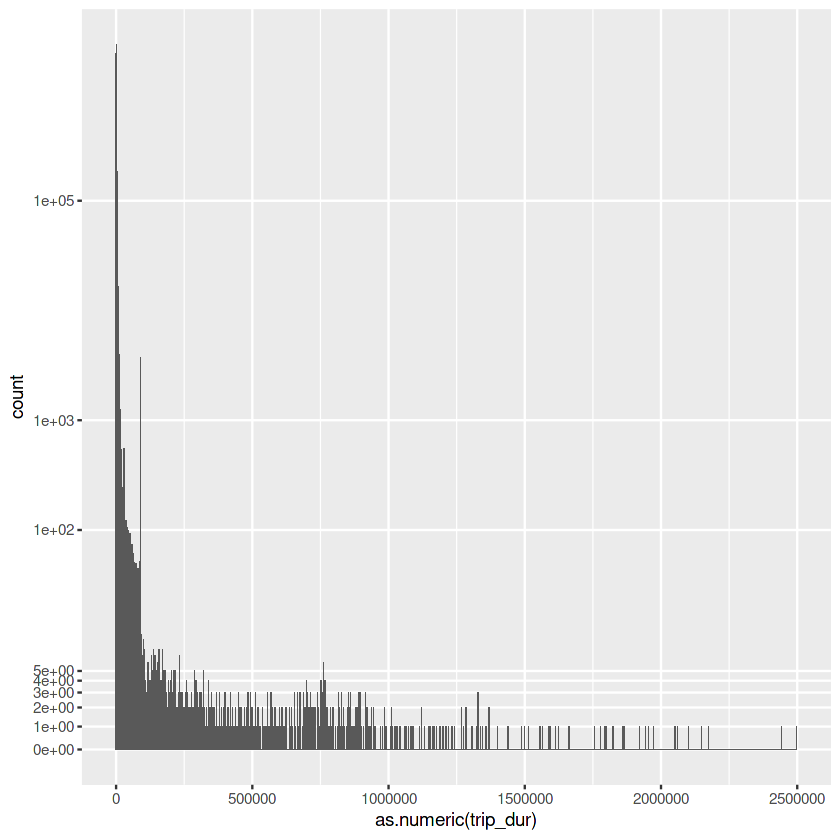

In [13]:
ggplot(total_trips, aes(as.numeric(trip_dur))) +
  geom_histogram(binwidth = 1000) +
  scale_y_continuous(trans = "pseudo_log",
                     breaks = c(0:5, 100, 1000, 100000), minor_breaks = NULL)

In [14]:
#Counting out trip duration that is over than 10.000 seconds (12 hours)
total_trips %>% select(ride_id, started_at, ended_at, trip_dur) %>%
    filter(trip_dur > 43200) %>%
    nrow

[1] 7461

With duration going as far as mora than 2,000,000 seconds (which is 23 days) which would either be a error in the data or a rare occurance. It's would be best to remove trip duration that is longer than 43200 (12 hours).

In [15]:
total_trips <- total_trips[total_trips$trip_dur < 43200, ]

### 4.2.4 Handle missing data

For this section, let's start by checking whether the dataframe contains any missing values.

In [16]:
map(total_trips, ~sum(is.na(.)))

$ride_id
[1] 0

$rideable_type
[1] 0

$started_at
[1] 0

$ended_at
[1] 0

$start_station_name
[1] 860754

$end_station_name
[1] 914607

$start_lat
[1] 0

$start_lng
[1] 0

$end_lat
[1] 971

$end_lng
[1] 971

$member_casual
[1] 0

$trip_dur
[1] 0

$day_of_week
[1] 0

Notice that there are missing values regarding latitute and longitute for end station. Let's check whether the rows contain informations that can be used.

In [17]:
df_missing_end <- total_trips[, c('end_station_name', 'end_lat', 'end_lng')] %>% 
    filter(is.na(end_lat))
map(df_missing_end, ~sum(is.na(.)))

$end_station_name
[1] 971

$end_lat
[1] 971

$end_lng
[1] 971

Without and information regarding its coordinates and station information, the data itself won't be providing any useful information and may even harm the overall analysis. Therefore, we will remove these affected rows completely.

In [18]:
total_trips <- total_trips %>% drop_na(end_lat)

Now, all we left are the missing data found in station name and id. The only way other than removing the particular row is to try and find out the name of the station based on coordinates.

In [19]:
#using the s2 package to solve this problem
library(s2)

#create a data frame consist of all the missing data for starting
df_missing_start <- total_trips %>% 
    filter(if_any(c(start_station_name), ~ is.na(.)))

df_no_missing_start <- total_trips %>% 
    filter(if_all(c(start_station_name), ~ !is.na(.)))

In [20]:
#create 2 tables onsist of station info and their coordinates 
#starting with the start trip station
coor_start<- total_trips[, c('start_station_name', 'start_lat', 'start_lng')] %>% 
    filter(if_all(c(start_station_name, start_lat, start_lng), ~ !is.na(.))) %>%
    `colnames<-`(c("station_name", "lat", "long"))

coor_end <- total_trips[, c('end_station_name', 'end_lat', 'end_lng')] %>% 
    filter(if_all(c(end_station_name, end_lat, end_lng), ~ !is.na(.))) %>%
    `colnames<-`(c("station_name", "lat", "long"))

#with the two dataframes filtered, we can then create a database for all the stations 
#to use as an reference
station_db <- distinct(rbind(coor_start, coor_end))

In [21]:
na_s2_s <- s2_lnglat(df_missing_start$start_lng, df_missing_start$start_lat)
no_na_s2 <- s2_lnglat(station_db$long, station_db$lat)
df_missing_start$start_station_name <- station_db$station_name[s2_closest_feature(na_s2_s, no_na_s2)]

In [22]:
#check for any missing values
df_missing_start %>% 
  summarise_at(c("start_station_name"), ~sum(is.na(.)))

start_station_name
<int>
0


Now, let's proceed next for the end station

In [23]:
trips_clean_df <- bind_rows(df_missing_start, df_no_missing_start)

In [24]:
df_missing_end <- trips_clean_df %>% 
    filter(if_any(c(end_station_name), ~ is.na(.)))

df_no_missing_end <- trips_clean_df %>% 
    filter(if_all(c(end_station_name), ~ !is.na(.)))

In [25]:
na_s2_e <- s2_lnglat(df_missing_end$end_lng, df_missing_end$end_lat)
df_missing_end$end_station_name <- station_db$station_name[s2_closest_feature(na_s2_e, no_na_s2)]

In [26]:
#check for any missing values
df_missing_end %>% 
  summarise_at(c("end_station_name"), ~sum(is.na(.)))

end_station_name
<int>
0


Great, now that there's no more NA value left, we can finaly proceed to the next phase.

In [27]:
trips_clean_df <- bind_rows(df_missing_end, df_no_missing_end)

In [28]:
#setDT(df_miss_2)[setDT(station_db), on = c("start_lat" = "lat", "start_lng" = "long"), `:=` 
#                 (start_station_name = i.station_name, start_station_id = i.station_id)]

#setDT(df_miss_2)[setDT(station_db), on = c("end_lat" = "lat", "end_lng" = "long"), `:=` 
#                 (end_station_name = i.station_name, end_station_id = i.station_id)]

# 5. Analyze Phase
In this phase, we going to use the data that we have cleaned to do analysis. Unfortunately, due to the limitation of Kaggle in processing large amount of data, we won't have enough RAM to continue with the analysis and visualization. Therefore, the rest of the process will be continued in Tableau.

## 5.1 Descriptive Analysis

We will be creating a summary description for the ride_length

In [29]:
a1 = max(trips_clean_df$trip_dur)
sprintf("The maximun time duration between trips is %i seconds, which is around %.2f hours", a1, a1/3600)
a2 = min(trips_clean_df$trip_dur)
sprintf("The minimum time duration between trips is %i seconds", a2)
a3 = mean(trips_clean_df$trip_dur)
sprintf("The average trip duration is %f seconds, which is %.2f minutes", a3, a3/60)

find_mode <- function(x) {
  u <- unique(x)
  tab <- tabulate(match(x, u))
  u[tab == max(tab)]
}

a4 = find_mode(trips_clean_df$day_of_week)
sprintf("The day where bike borrows happen the most is %s", a4)

[1] "The maximun time duration between trips is 43193 seconds, which is around 12.00 hours"

[1] "The minimum time duration between trips is 1 seconds"

[1] "The average trip duration is 1021.192103 seconds, which is 17.02 minutes"

[1] "The day where bike borrows happen the most is Saturday"

Let's do a comparison between members and casual users

member_casual,num_of_rides,mean,median,max,min
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
member,3377603,750.8516,541,43193,1
casual,2514792,1384.2849,862,43193,1


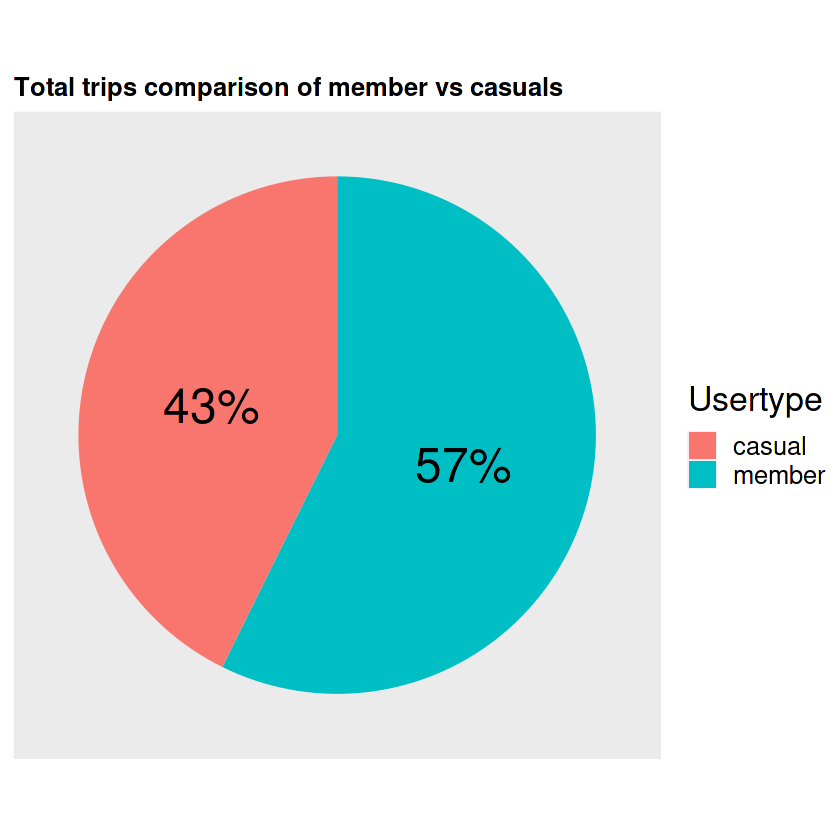

In [30]:
#Summary statistical comparison
setDT(trips_clean_df)[,list(num_of_rides = .N,
                            mean   = mean(trip_dur), 
                            median = median(trip_dur), 
                            max    = max(trip_dur),
                            min    = min(trip_dur)), by=member_casual]

#Creating visual for statistic comparison
pie <- setDT(trips_clean_df)[, list(total_trips = length(trip_dur)), 
                                by = list(usertype = member_casual)]

ggplot(pie, aes(x = "", y = total_trips, fill = usertype)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(fill = "Usertype") +
  theme(legend.title = element_text(size=20),
       legend.text   = element_text(size=15),
       plot.title    = element_text(size=15, face="bold"),
       axis.title.x  = element_blank(),
       axis.title.y  = element_blank(),
       axis.ticks    = element_blank(),
       axis.text     = element_blank(),
       panel.grid    = element_blank()) +
  ggtitle("Total trips comparison of member vs casuals") +
  geom_text(aes(
    y = total_trips / 2 + c(0, cumsum(total_trips)[-length(total_trips)]),
    label = percent(total_trips / sum(total_trips))
  ), size = 10)

What about average ride time by each day for members vs casual users

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,1426.5260,1209.5444,1191.0877,1222.8229,1279.2050,1528.4051,1597.1723
member,728.5199,702.9657,710.0679,719.7463,732.8202,839.8807,849.5002


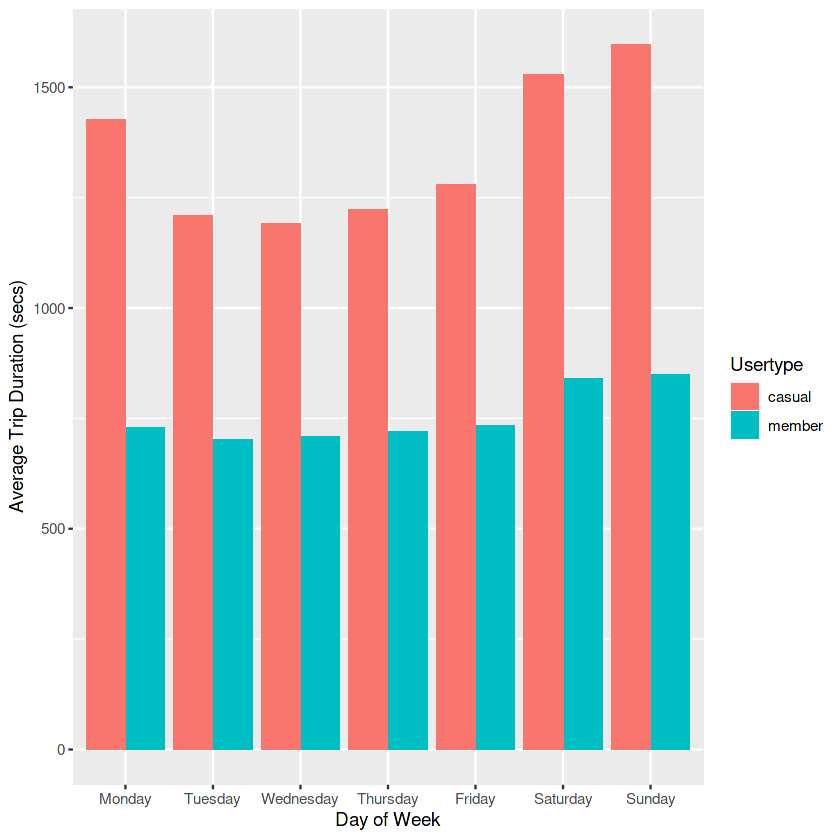

In [31]:
#creating table for average ride time by each day for members vs casual users
b <- setDT(trips_clean_df)[, list(mean = mean(trip_dur), num_of_rides = .N), by= list(member_casual, day_of_week)]
b$day_of_week <- ordered(b$day_of_week, levels= c("Monday", "Tuesday", "Wednesday", 
                                                 "Thursday", "Friday", "Saturday", "Sunday"))
as.data.frame.matrix(xtabs(mean ~ member_casual + day_of_week, b))

#Creating visuals from the comparison
ggplot(b, aes(x = day_of_week, y = mean, fill = member_casual)) +
    geom_bar(stat='identity', position='dodge') +
    labs(fill = "Usertype") +
    xlab("Day of Week") + ylab("Average Trip Duration (secs)")

As well as number of trips per day

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
casual,298787,273015,281091,315255,346643,525963,474038
member,472174,523131,522411,522433,466460,453255,417739


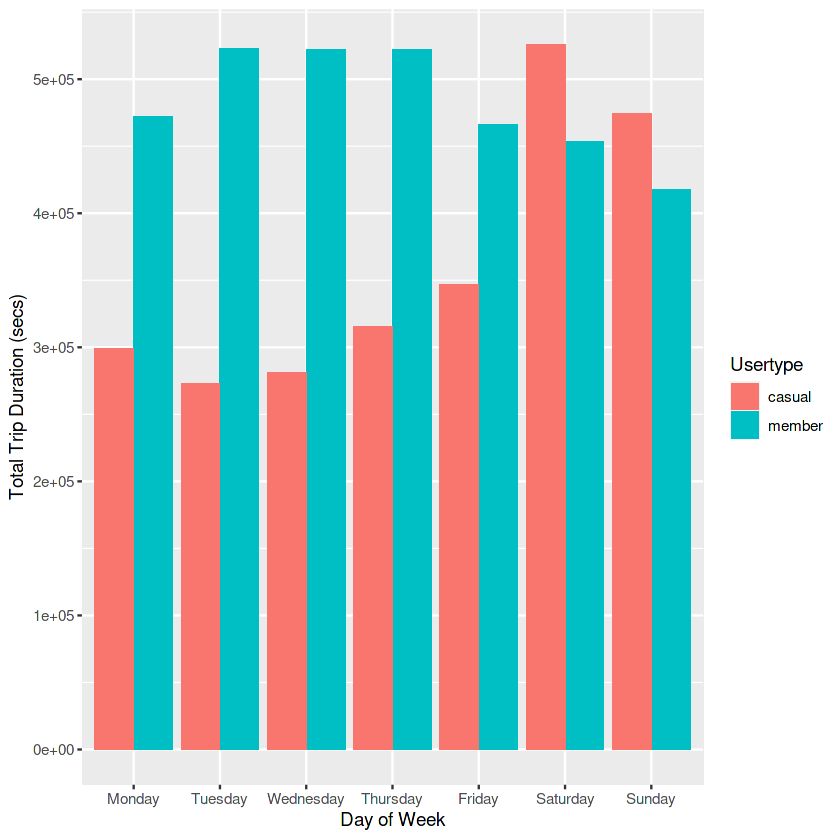

In [32]:
#Table representation for number of rides between usertypes
as.data.frame.matrix(xtabs(num_of_rides ~ member_casual + day_of_week, b))

#Visual represntation
ggplot(b, aes(x = day_of_week, y = num_of_rides, fill = member_casual)) +
    geom_bar(stat='identity', position='dodge') +
    labs(fill = "Usertype") +
    xlab("Day of Week") + ylab("Total Trip Duration (secs)")

## 5.2 Exporting
The rest of the analysis and visualization will be continued in Tableau.

In [33]:
#Dropping some columns to fulfill the Tableau Public size limit
drops_2 <- c("end_lat", "end_lng", "ended_at")
trips_clean_df <- trips_clean_df[ , !(names(trips_clean_df) %in% drops_2)]

In [34]:
write.csv(trips_clean_df, "bike_trips.csv")

# 6. Share and Act Phase
All the process and analysis are done in Tableau Public. The result are then created in a story form.

Here is the [link](https://public.tableau.com/views/CapstoneProject-CyclisticCaseStudy/Story_1?:language=en-US&:display_count=n&:origin=viz_share_link)